In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
X=df['thalach']
y=df['target']==1

In [6]:
print(X)

0       168
1       155
2       125
3       161
4       106
       ... 
1020    164
1021    141
1022    118
1023    159
1024    113
Name: thalach, Length: 1025, dtype: int64


In [7]:
print(y)

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021    False
1022    False
1023     True
1024    False
Name: target, Length: 1025, dtype: bool


In [8]:
null_counts = X.isnull().sum()
# Print the counts of null values per column
print(null_counts)

0


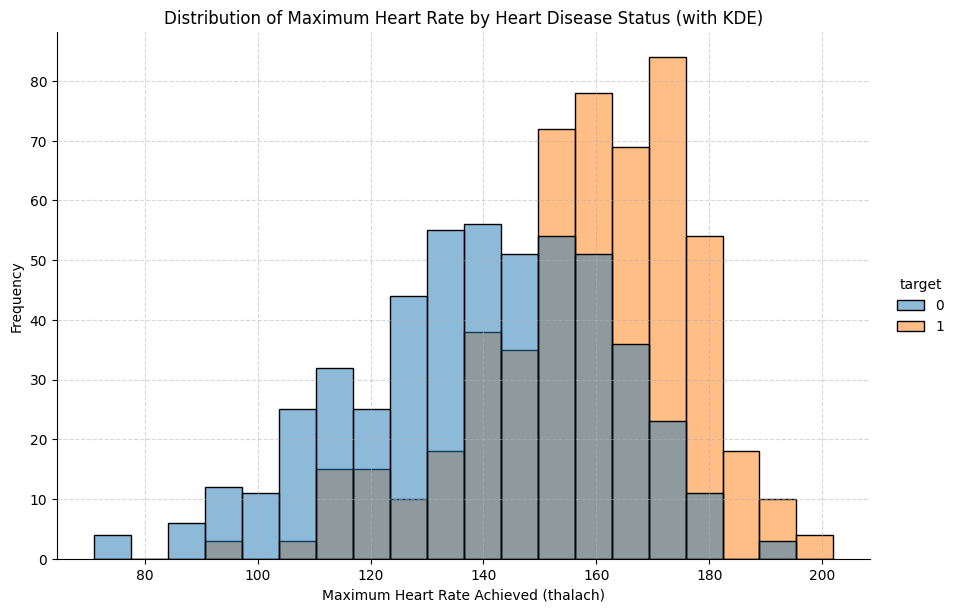

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame containing the data
sns.displot(data=df, x='thalach',hue='target', bins=20, height=6, aspect=1.5)

plt.xlabel('Maximum Heart Rate Achieved (thalach)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Heart Rate by Heart Disease Status (with KDE)')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Selecting only the feature and target variable
X = df[['thalach']]
y = df['target']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models and their parameter grids
models_and_params = [
    ('Logistic Regression', LogisticRegression(), {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000], 'solver': ['liblinear', 'lbfgs']})
]

best_model = None

# Loop through models, perform grid search, fit, predict, and evaluate
for model_name, model, param_grid in models_and_params:
    print(f"Running GridSearchCV for: {model_name}")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("=" * 50)




Running GridSearchCV for: Logistic Regression
Model: Logistic Regression
Best Parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 69.16%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.69       159
           1       0.66      0.73      0.70       149

    accuracy                           0.69       308
   macro avg       0.69      0.69      0.69       308
weighted avg       0.69      0.69      0.69       308

Confusion Matrix:
[[104  55]
 [ 40 109]]


In [12]:
# Dự đoán kết quả
y_pred_new = best_model.predict([[156]])
print(f"Predicted target for new data: {y_pred_new}")

Predicted target for new data: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Train model
model = LogisticRegression(C=10, solver='liblinear')
model.fit(X_train, y_train)

# Coefficients and intercept
coeff = model.coef_[0]
intercept = model.intercept_[0]

print(f"Coefficient: {coeff}, Intercept: {intercept}")


Coefficient: [0.03668801 0.76416394], Intercept: -6.466323279062442


In [ ]:
# Assuming 'model' is already trained and 'coeff' and 'intercept' are extracted as shown previously.

header_content = f"""#ifndef LOGISTIC_REGRESSION_COEFFICIENTS_H
#define LOGISTIC_REGRESSION_COEFFICIENTS_H

// Coefficients for the Logistic Regression Model
const double coefficient = {coeff};
const double intercept = {intercept};

#endif // LOGISTIC_REGRESSION_COEFFICIENTS_H
"""

# Save this to a .h file
with open("/content/drive/MyDrive/LogisticRegressionCoefficients.h", "w") as file:
    file.write(header_content)
